<a href="https://colab.research.google.com/github/ansar-mazhar/Task2_DataScience/blob/main/Task2_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 2: Analyzing Enemployment Rate in India Due to Covid-19

# Importing Libraries

In [1]:
import pandas as pd

#Load DataSets

In [2]:
DataSet1 = "/content/Unemployment in India.csv"
DataSet2 = "/content/Unemployment_Rate_upto_11_2020.csv"
# Reading CSV Files
df1 = pd.read_csv(DataSet1) # have null values
df2 = pd.read_csv(DataSet2) # don't have null values


# Data Cleansing

In [3]:
# Standardize column names (remove spaces)
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
# Convert date to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True, errors='coerce')
# Dropping Missing Values
df1.dropna(inplace=True)
df2.dropna(inplace=True)
# Ensure numerical columns are in correct type
numeric_cols1 = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
numeric_cols2 = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)','longitude','latitude']
df1[numeric_cols1] = df1[numeric_cols1].apply(pd.to_numeric, errors='coerce')
df2[numeric_cols2] = df2[numeric_cols2].apply(pd.to_numeric, errors='coerce')

# Saving Clean DataSets

In [4]:
# Save cleaned datasets
df1.to_csv("Cleaned_Unemployment_India.csv", index=False)
df2.to_csv("Cleaned_Unemployment_Rate.csv", index=False)
# Checking Whether the Data is Cleansed or Not
df1_missing = df1.isnull().sum()
df2_missing = df2.isnull().sum()
print("Dataset 1 (2019-2020) Missing Values:")
print(df1_missing)
print("\nDataset 2 (2020) Missing Values:")
print(df2_missing)
print("\nCleaning Completed!")

Dataset 1 (2019-2020) Missing Values:
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

Dataset 2 (2020) Missing Values:
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

Cleaning Completed!


# Exploratory Data Analysis (EDA)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#Summary Statistics
print("Dataset 1 Summary:\n", df1.describe())
print("\nDataset 2 Summary:\n", df2.describe())

Dataset 1 Summary:
                                 Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                     

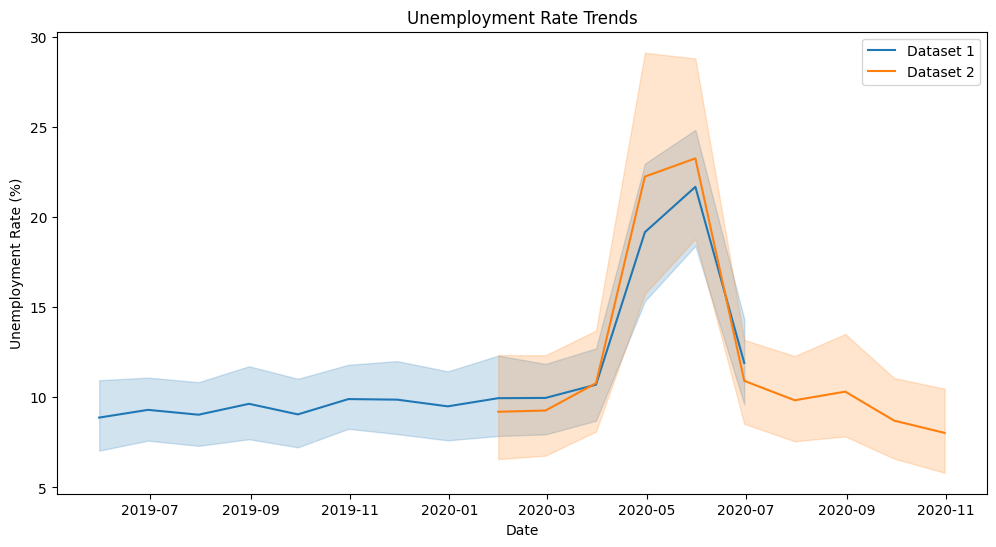

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 640x480 with 0 Axes>

In [25]:
# Plot unemployment trends over time in both datasets
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='Date', y='Estimated Unemployment Rate (%)', label='Dataset 1')
sns.lineplot(data=df2, x='Date', y='Estimated Unemployment Rate (%)', label='Dataset 2')
plt.title("Unemployment Rate Trends")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()
from google.colab import drive



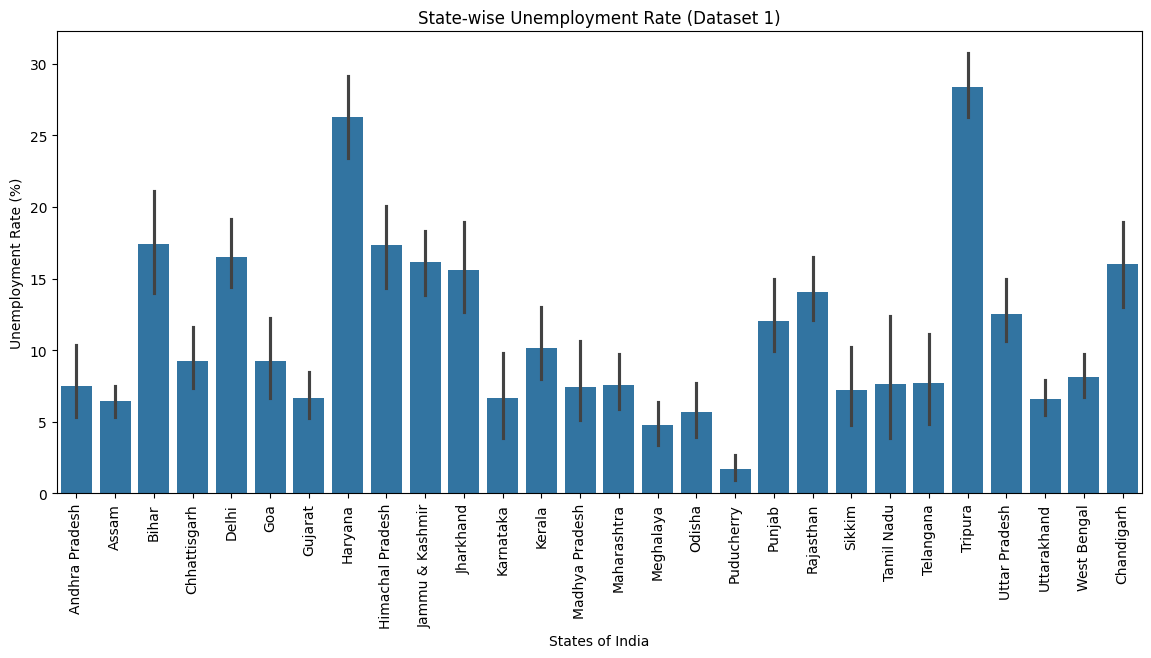

               Region       Date  Estimated Unemployment Rate (%)
384    Andhra Pradesh 2020-04-30                            32.30
392             Assam 2019-10-31                            11.17
38              Bihar 2020-05-31                            47.26
421        Chandigarh 2019-11-30                            22.05
440      Chhattisgarh 2020-06-30                            27.07
453             Delhi 2020-05-31                            45.78
461               Goa 2019-11-30                            25.20
478           Gujarat 2020-04-30                            25.94
492           Haryana 2020-04-30                            46.89
504  Himachal Pradesh 2020-02-29                            27.31
512   Jammu & Kashmir 2019-10-31                            24.06
144         Jharkhand 2020-04-30                            41.72
158         Karnataka 2020-04-30                            33.17
559            Kerala 2020-05-31                            30.28
573    Mad

In [29]:
# State-wise unemployment comparison (Dataset 1)
plt.figure(figsize=(14, 6))
sns.barplot(data=df1, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title("State-wise Unemployment Rate (Dataset 1)")
plt.xlabel("States of India")
plt.ylabel("Unemployment Rate (%)")
plt.show()
# Group by 'Region' (State) and find the row with the max unemployment rate
state_peaks = df1.loc[df1.groupby('Region')['Estimated Unemployment Rate (%)'].idxmax(), ['Region', 'Date', 'Estimated Unemployment Rate (%)']]

# Display the peaks for each state
print(state_peaks)

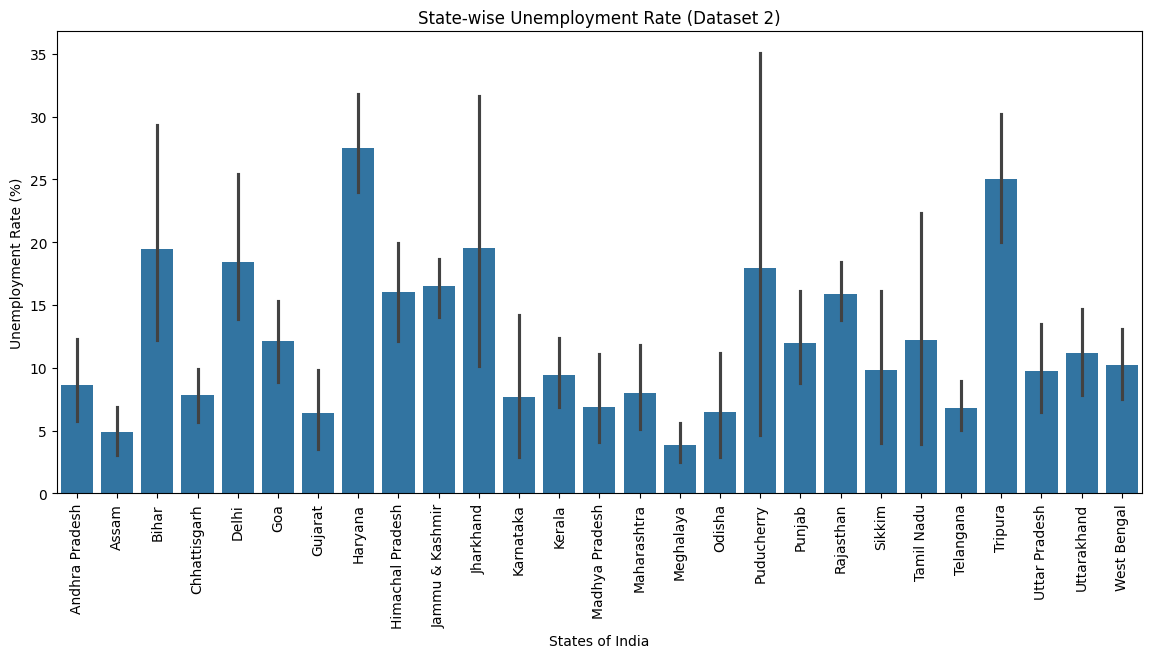

In [15]:
# State-wise unemployment comparison (Dataset 2)
plt.figure(figsize=(14, 6))
sns.barplot(data=df2, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title("State-wise Unemployment Rate (Dataset 2)")
plt.xlabel("States of India")
plt.ylabel("Unemployment Rate (%)")
plt.show()

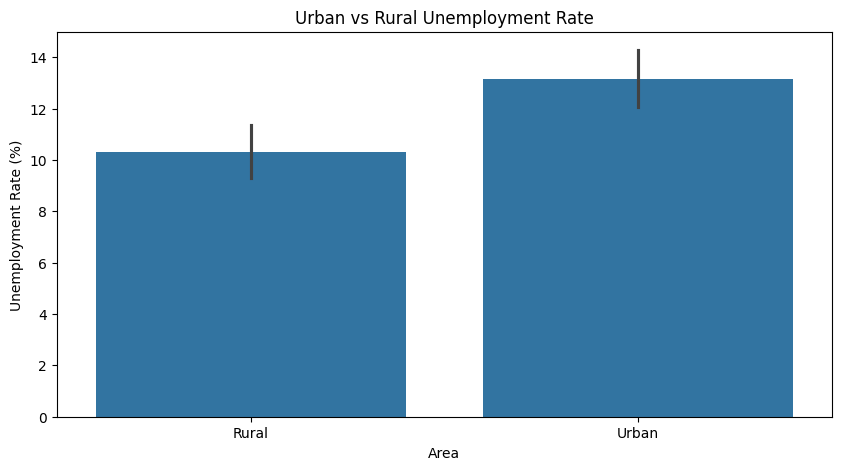

Exploratory Data Analysis Completed!


In [16]:
# Urban vs Rural comparison (Dataset 1)
plt.figure(figsize=(10, 5))
sns.barplot(data=df1, x='Area', y='Estimated Unemployment Rate (%)')
plt.title("Urban vs Rural Unemployment Rate")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()

print("Exploratory Data Analysis Completed!")